In [23]:
import sys
from pathlib import Path
import importlib
import pandas as pd

# Adicionar o diretório raiz ao sys.path
sys.path.append(str(Path.cwd().parent / "scripts"))

import interestRiskLib # type: ignore
importlib.reload(interestRiskLib)

from interestRiskLib import ( # type: ignore
    calcular_valor_presente,
    peso_valor_presente,
    peso_por_periodo,
    calcular_duration,
    calcular_convexity,
    gerar_fluxos_juros,
    gerar_fluxos_descontos,
    constroi_cenario,
    interest_rate_graph
)

In [5]:
# Carregar os dados mockados
passivos = pd.read_csv('../dataset/passivos.csv')

In [6]:
# Iterar sobre os ativos para calcular Duration e Convexity
resultado_passivo = []
for i, passivos_it in passivos.iterrows():
    fluxos = gerar_fluxos_descontos(passivos_it['Datas dos Fluxos (T)'], passivos_it['Valor Mensal (R$)'], passivos_it['Taxa de Desconto (%)']) 
    taxa = passivos_it['Taxa de Desconto (%)']
    
    duration = calcular_duration(fluxos, taxa)
    convexity = calcular_convexity(fluxos, taxa)
    total = sum(calcular_valor_presente(fluxos, taxa))
    
    resultado_passivo.append({
        'Passivo': passivos_it['Tipo de Passivo'],
        'Duration': duration,
        'Convexity': convexity,
        'Taxa': taxa,
        'Total': total
    })

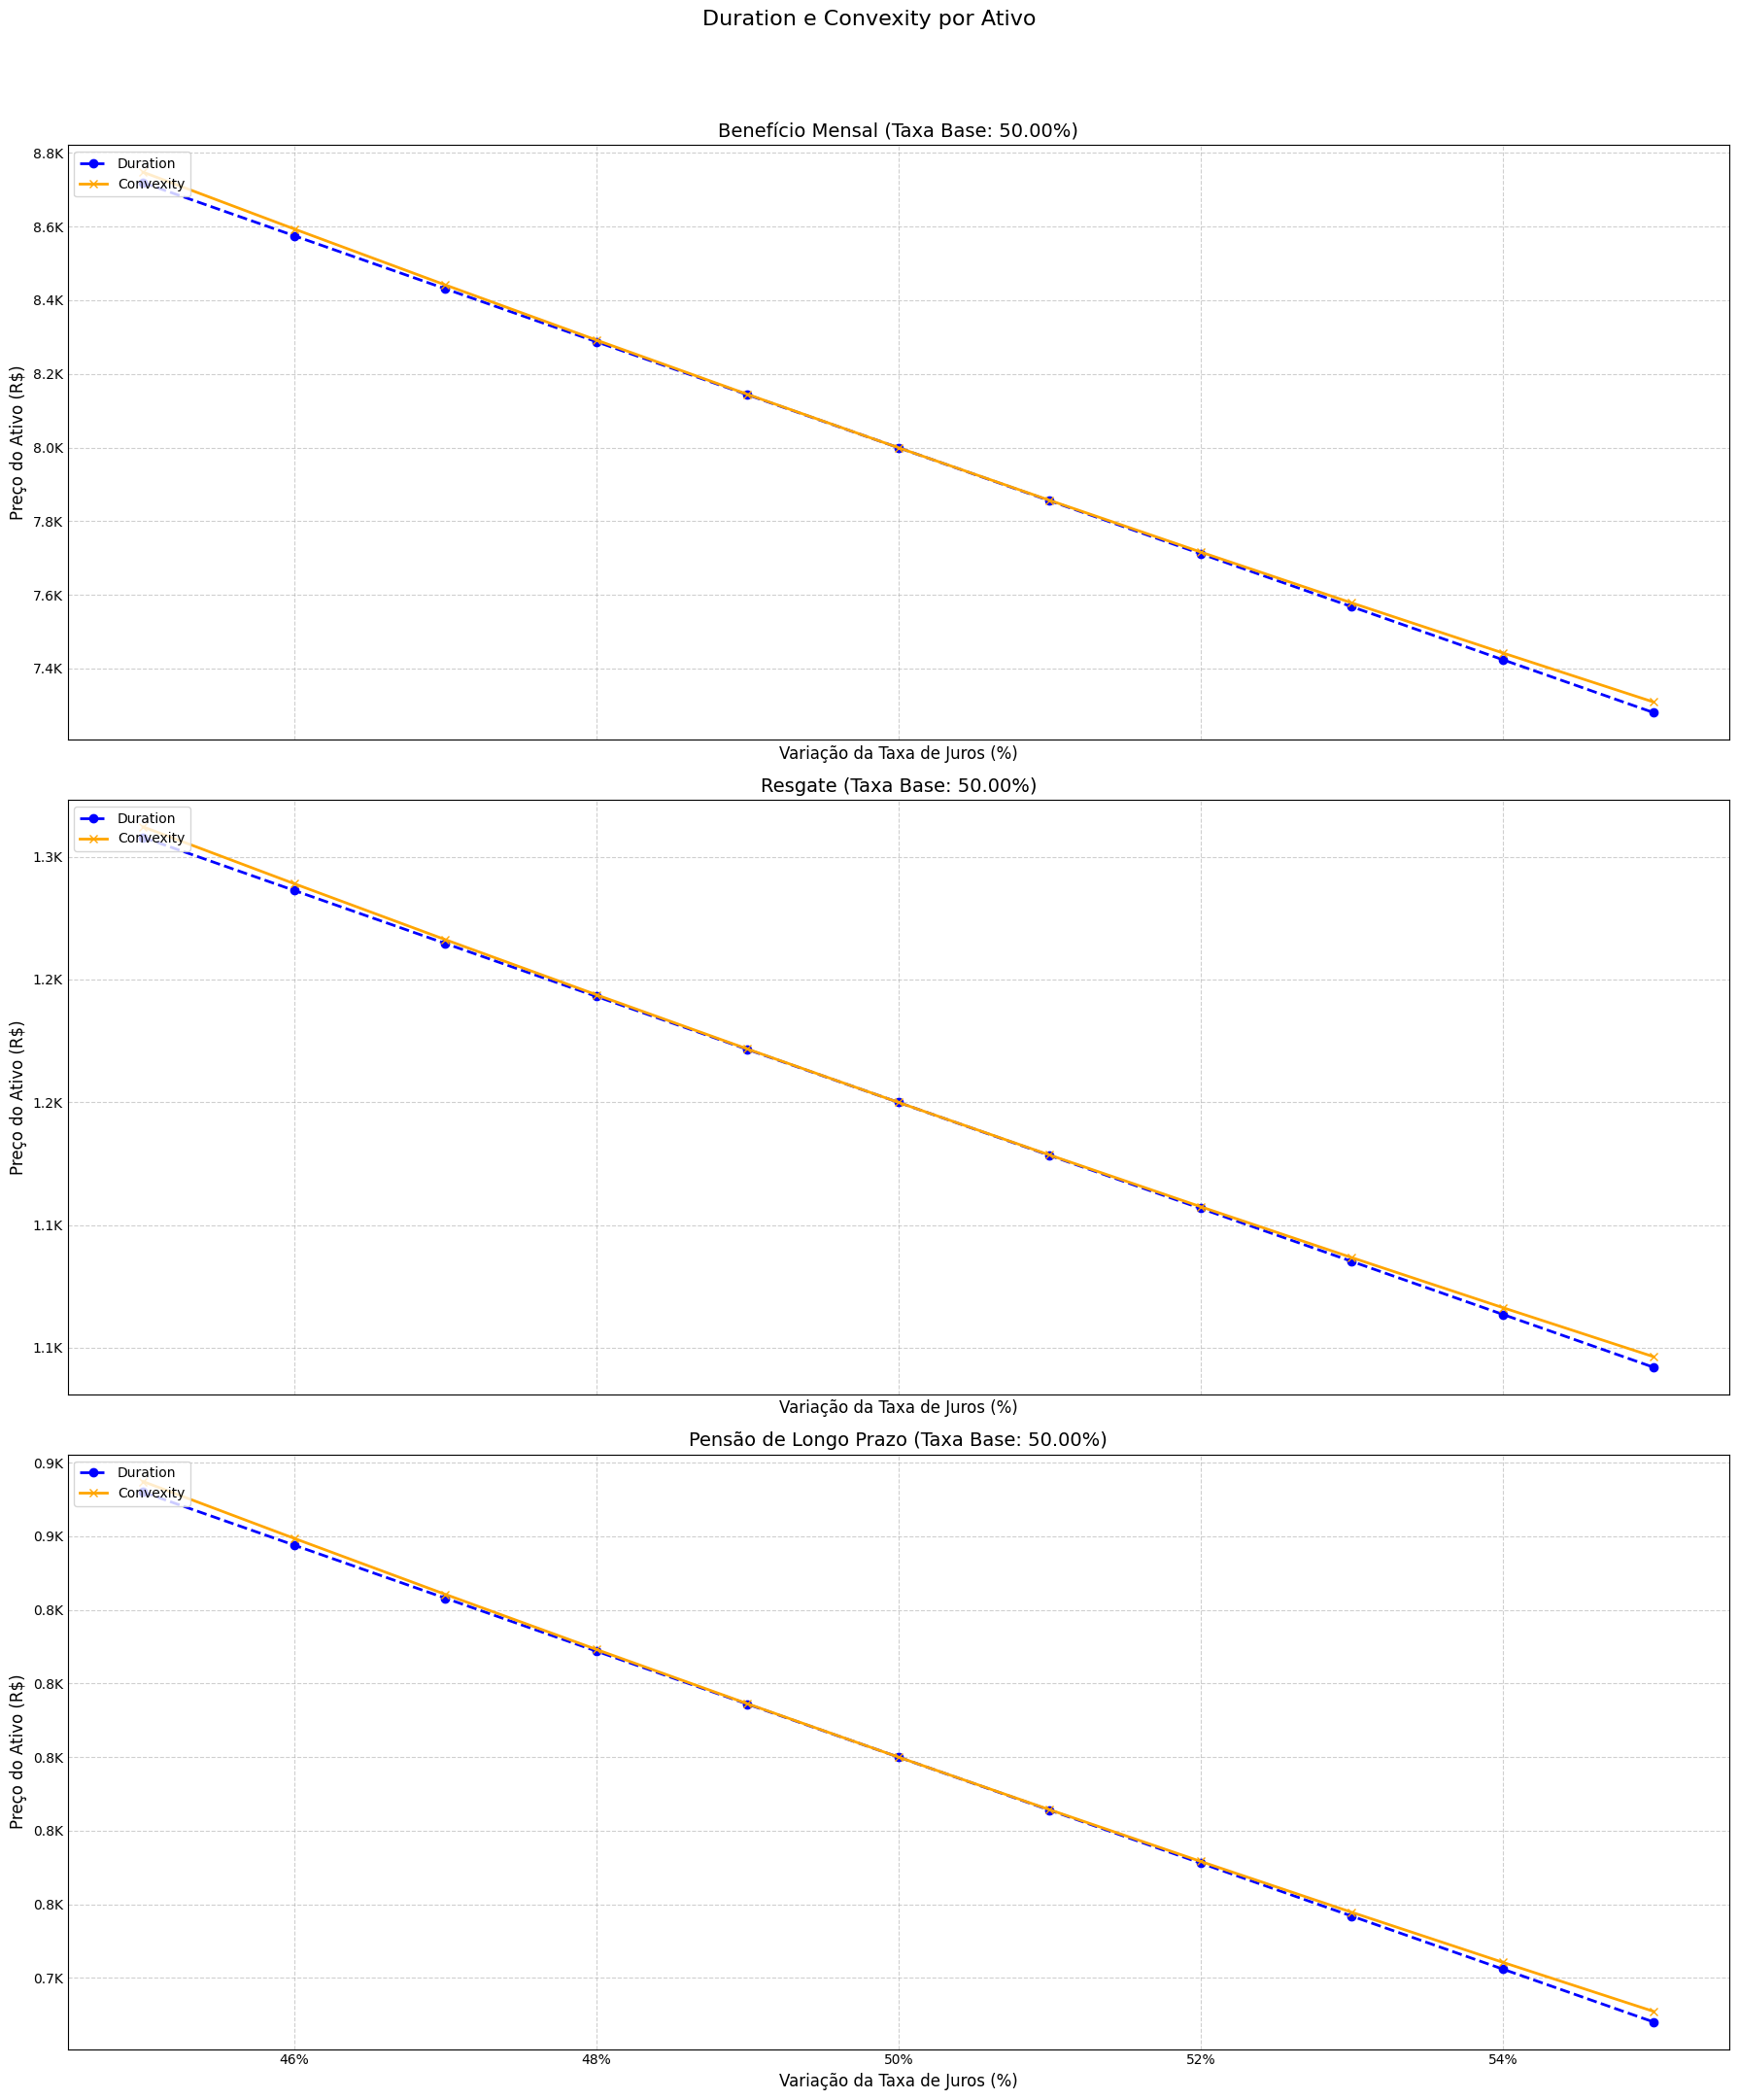

In [24]:
# Criar um DataFrame com os resultados
df_resultados = pd.DataFrame(resultado_passivo)
interest_rate_graph(df_resultados, 0.01, 1)